In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier #the algorithm
from sklearn.model_selection import train_test_split #train and test split function
from sklearn import metrics # to calculate model accuracy

In [2]:
#load data file
from google.colab import files
import io
uploaded = files.upload()
print('Success - Data file is now uploaded from a local drive!')

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv
Success - Data file is now uploaded from a local drive!


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']), header = 0, delimiter = ',')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dups = df.duplicated(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])
df[dups]
#checking for duplicate rows, there are none

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [5]:
df_gender = df['gender'].value_counts()
df_gender


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [6]:
df_smoking_status = df['smoking_status'].value_counts()
df_smoking_status

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [7]:
df_ever_married = df['ever_married'].value_counts()
df_ever_married

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [8]:
df_Residence_type = df['Residence_type'].value_counts()
df_Residence_type

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [9]:
df_work_type = df['work_type'].value_counts()
df_work_type

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [10]:
df.describe()

#age is from 9 months old to 82 months
#hypertension is from 0 to 1
#heart disease is from 0 to 1
#average glucose level 55-271mg/dL, diabetes >125, prediabetes 100-125, normoglycemia 70-99, hypoglycemia <70
#bmi is from 10 to 97, underweight is <18.5, normal is 18.5-24.9, overweight is 25-29.9, obese 30-39.9, morbidly obese >40
#stroke is from 0 to 1, 0 no, 1 is yes

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.info()

#bmi has missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Text(33.0, 0.5, 'Participant Index')

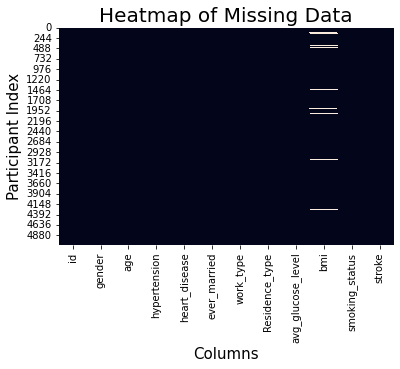

In [12]:
#heatmap to visualize missing data
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap of Missing Data', fontsize = 20) 
plt.xlabel('Columns', fontsize = 15)
plt.ylabel('Participant Index', fontsize = 15)

In [13]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


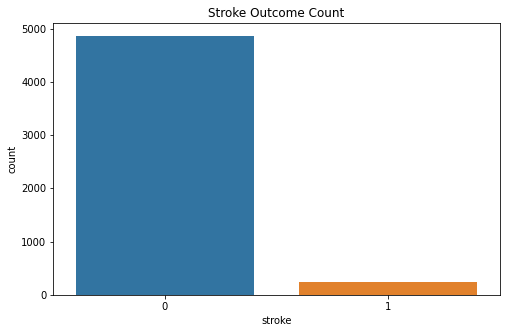

In [14]:
#Checking for data imbalance
plt.figure(figsize =(8, 5))
sns.countplot(df['stroke'])
plt.title('Stroke Outcome Count')
plt.show()



Convert Categorical Data to Numerical Data 

In [15]:
# https://www.geeksforgeeks.org/replacing-missing-values-using-pandas-in-python/
# replacing missing values in quantity
# column with mean of that column
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [16]:
# https://towardsdatascience.com/learning-one-hot-encoding-in-python-the-easy-way-665010457ad9
# Converting the object type data into categorical data column
for col in ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']:
  df[col] = df[col].astype('category')
print(df.dtypes)

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


In [17]:
# Assigning the binary values 
df = pd.get_dummies(data=df,columns=['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status'])
print(df)

         id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0      9046  67.0             0              1             228.69  36.600000   
1     51676  61.0             0              0             202.21  28.893237   
2     31112  80.0             0              1             105.92  32.500000   
3     60182  49.0             0              0             171.23  34.400000   
4      1665  79.0             1              0             174.12  24.000000   
...     ...   ...           ...            ...                ...        ...   
5105  18234  80.0             1              0              83.75  28.893237   
5106  44873  81.0             0              0             125.20  40.000000   
5107  19723  35.0             0              0              82.99  30.600000   
5108  37544  51.0             0              0             166.29  25.600000   
5109  44679  44.0             0              0              85.28  26.200000   

      stroke  gender_Female  gender_Mal

In [18]:
# Assigning order to the categorical column - ORDINAL
# from sklearn.preprocessing import LabelEncoder
# Initializing an object of class LabelEncoder
#labelencoder = LabelEncoder() df['ever_married'] = labelencoder.fit_transform(df['ever_married'])
print(df)

         id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0      9046  67.0             0              1             228.69  36.600000   
1     51676  61.0             0              0             202.21  28.893237   
2     31112  80.0             0              1             105.92  32.500000   
3     60182  49.0             0              0             171.23  34.400000   
4      1665  79.0             1              0             174.12  24.000000   
...     ...   ...           ...            ...                ...        ...   
5105  18234  80.0             1              0              83.75  28.893237   
5106  44873  81.0             0              0             125.20  40.000000   
5107  19723  35.0             0              0              82.99  30.600000   
5108  37544  51.0             0              0             166.29  25.600000   
5109  44679  44.0             0              0              85.28  26.200000   

      stroke  gender_Female  gender_Mal

In [19]:
df1 = df.drop(['id'], axis = 1)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   uint8  
 7   gender_Male                     5110 non-null   uint8  
 8   gender_Other                    5110 non-null   uint8  
 9   ever_married_No                 5110 non-null   uint8  
 10  ever_married_Yes                5110 non-null   uint8  
 11  work_type_Govt_job              5110 non-null   uint8  
 12  work_type_Never_worked          51

In [21]:
df.to_csv('healthcare-dataset-stroke-data-ONE HOT ENCODED.csv')
from google.colab import files
files.download('healthcare-dataset-stroke-data-ONE HOT ENCODED.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
df1.to_csv('healthcare-dataset-stroke-data-ONE HOT ENCODED-no index.csv')
from google.colab import files
files.download('healthcare-dataset-stroke-data-ONE HOT ENCODED-no index.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Oversampling 


In [23]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']


In [24]:
#divide data into training and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [25]:
y_train.value_counts()

0    3901
1     187
Name: stroke, dtype: int64

In [26]:
y_test.value_counts()

0    960
1     62
Name: stroke, dtype: int64

In [27]:
#minority class and majority class will have 1:1 ratio

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 1)
# Resample X and y so there are equal numbers of each y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


In [28]:
y_train_ros.value_counts()



0    3901
1    3901
Name: stroke, dtype: int64

In [29]:
df_train_ros = pd.concat([X_train_ros, y_train_ros], axis=1)

df_train_ros

df_train_ros.to_csv('stroke_train_dataset.csv')
from google.colab import files
files.download('stroke_train_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
df_train_ros['stroke'].value_counts()

0    3901
1    3901
Name: stroke, dtype: int64

In [31]:
df_train_ros

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,4970,79.0,0,0,112.64,28.5,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,56137,62.0,0,0,88.32,36.3,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,54590,21.0,0,0,59.52,33.7,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3,36548,31.0,0,0,65.70,30.4,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,61171,31.0,0,0,59.63,19.9,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7797,210,81.0,0,0,91.54,31.4,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
7798,1665,79.0,1,0,174.12,24.0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
7799,35578,78.0,0,0,90.19,26.9,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
7800,39912,32.0,0,0,76.13,29.9,1,0,0,0,...,1,0,0,1,0,0,0,0,1,1


In [32]:
df_test = pd.concat([X_test, y_test], axis =1)
df_test

df_test.to_csv('stroke_test_dataset.csv')
from google.colab import files
files.download('stroke_test_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


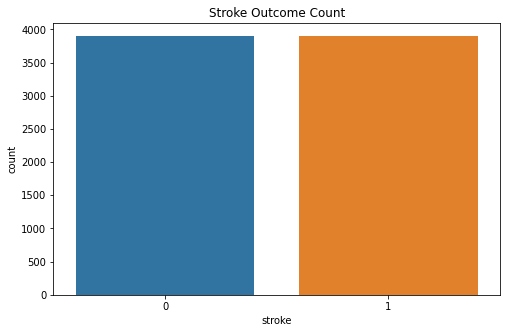

In [33]:
#Checking for data imbalance
plt.figure(figsize =(8, 5))
sns.countplot(df_train_ros['stroke'])
plt.title('Stroke Outcome Count')
plt.show()

K-Nearest Neighbor (KNN) Algorithm in Python

In [34]:
#https://datagy.io/python-knn/
#https://hands-on.cloud/implementing-knn-algorithm-using-python/
#Fit kNN in Python Using scikit-learn

In [35]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier #majority vote 
from sklearn.neighbors import KNeighborsRegressor #mean of the nearest neighbor labels
from seaborn import load_dataset

In [36]:
# applying standard scale method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scaling training and testing data set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
#creating a classifier object in sklearn
clf = KNeighborsClassifier(p=1, n_neighbors=4) #p=1 is for Euclidian distance

In [38]:
#fitting our model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [39]:
#making predictions
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [40]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.9393346379647749
Precision: 0.5
Recall: 0.03225806451612903


In [41]:
#rmse of train data
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = clf.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.21099892877738852

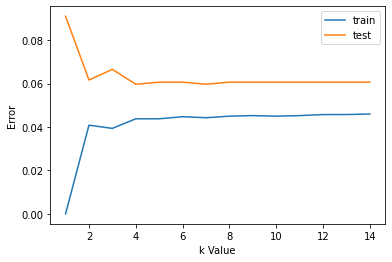

In [42]:
#creating sets for errors
error1= []
error2= []

#for loop 
for k in range(1,15):
    #using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)

    #storing the errors
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))

# ploting the graphs for testing and training 
plt.plot(range(1,15), error1, label="train")
plt.plot(range(1,15), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

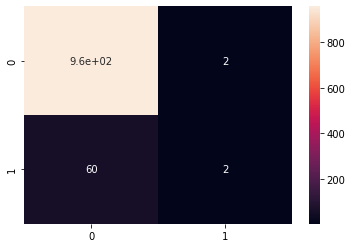

In [43]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

#providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

#if True, write the data value in each cell
sns.heatmap(cm,annot=True)

#saving confusion matrix in png form
#plt.savefig('confusion_Matrix.png')
#print(cm)

In [44]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

In [45]:
# importing accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

# finding the whole report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.72      0.52      0.51      1022
weighted avg       0.91      0.94      0.91      1022

